Basic imports:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Read the csv file

In [3]:
df_train = pd.read_csv('1_train.csv')
df_test = pd.read_csv('1_test.csv')

Lets learn different info about the table

In [4]:
df_train.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [5]:
df_train.shape

(630000, 13)

In [6]:
df_test.shape

(270000, 12)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [8]:
df_train.describe()

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


There are 630000 objects in train dataset and 270000 in test

There are no NaNs in any row

There are some numerical features: age, study_hours, class_attendance, sleep_hours;

Categorial: gender, course, sleep_quality, study_method, facility_rating, exam_difficulty;

Bool: internet_access

age of student is between [17, 24];

study_hours [0.08, 7.91];

class_attendance [40.6% , 99.4%];

sleep_hours [4.1, 9.9];

scores [19.599, 100];


Lets see what unique categorial features we have:

In [9]:
print('gender:',df_train.gender.unique())

gender: ['female' 'other' 'male']


In [10]:
print('course:',df_train.course.unique())

course: ['b.sc' 'diploma' 'bca' 'b.com' 'ba' 'bba' 'b.tech']


In [11]:
print('sleep_quality:',df_train.sleep_quality.unique())

sleep_quality: ['average' 'poor' 'good']


In [12]:
print('study_method:',df_train.study_method.unique())

study_method: ['online videos' 'self-study' 'coaching' 'group study' 'mixed']


In [13]:
print('facility_rating:',df_train.facility_rating.unique())

facility_rating: ['low' 'medium' 'high']


In [14]:
print('exam_difficulty:',df_train.exam_difficulty.unique())

exam_difficulty: ['easy' 'moderate' 'hard']


Lets see how numerical features correlate with our target(exam_score) and with each other

<Axes: >

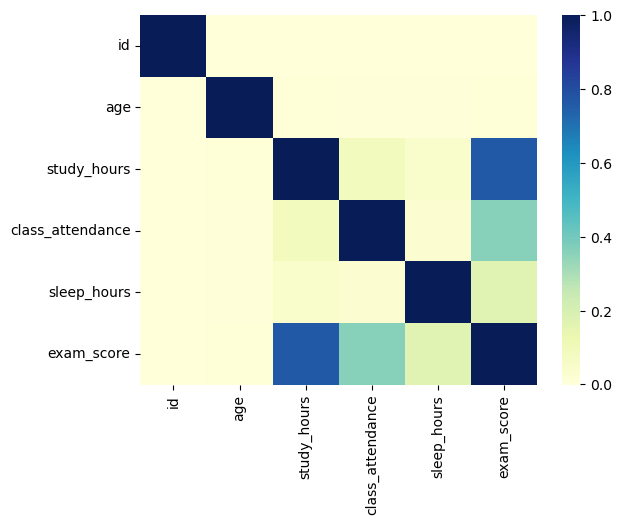

In [15]:
data_corr = df_train.corr(numeric_only = True)
sns.heatmap(data_corr, cmap="YlGnBu")

Our features don`t correlate with each other (no multicollinearity)

Study_hours and class_attendance have a great influence on exam_score 

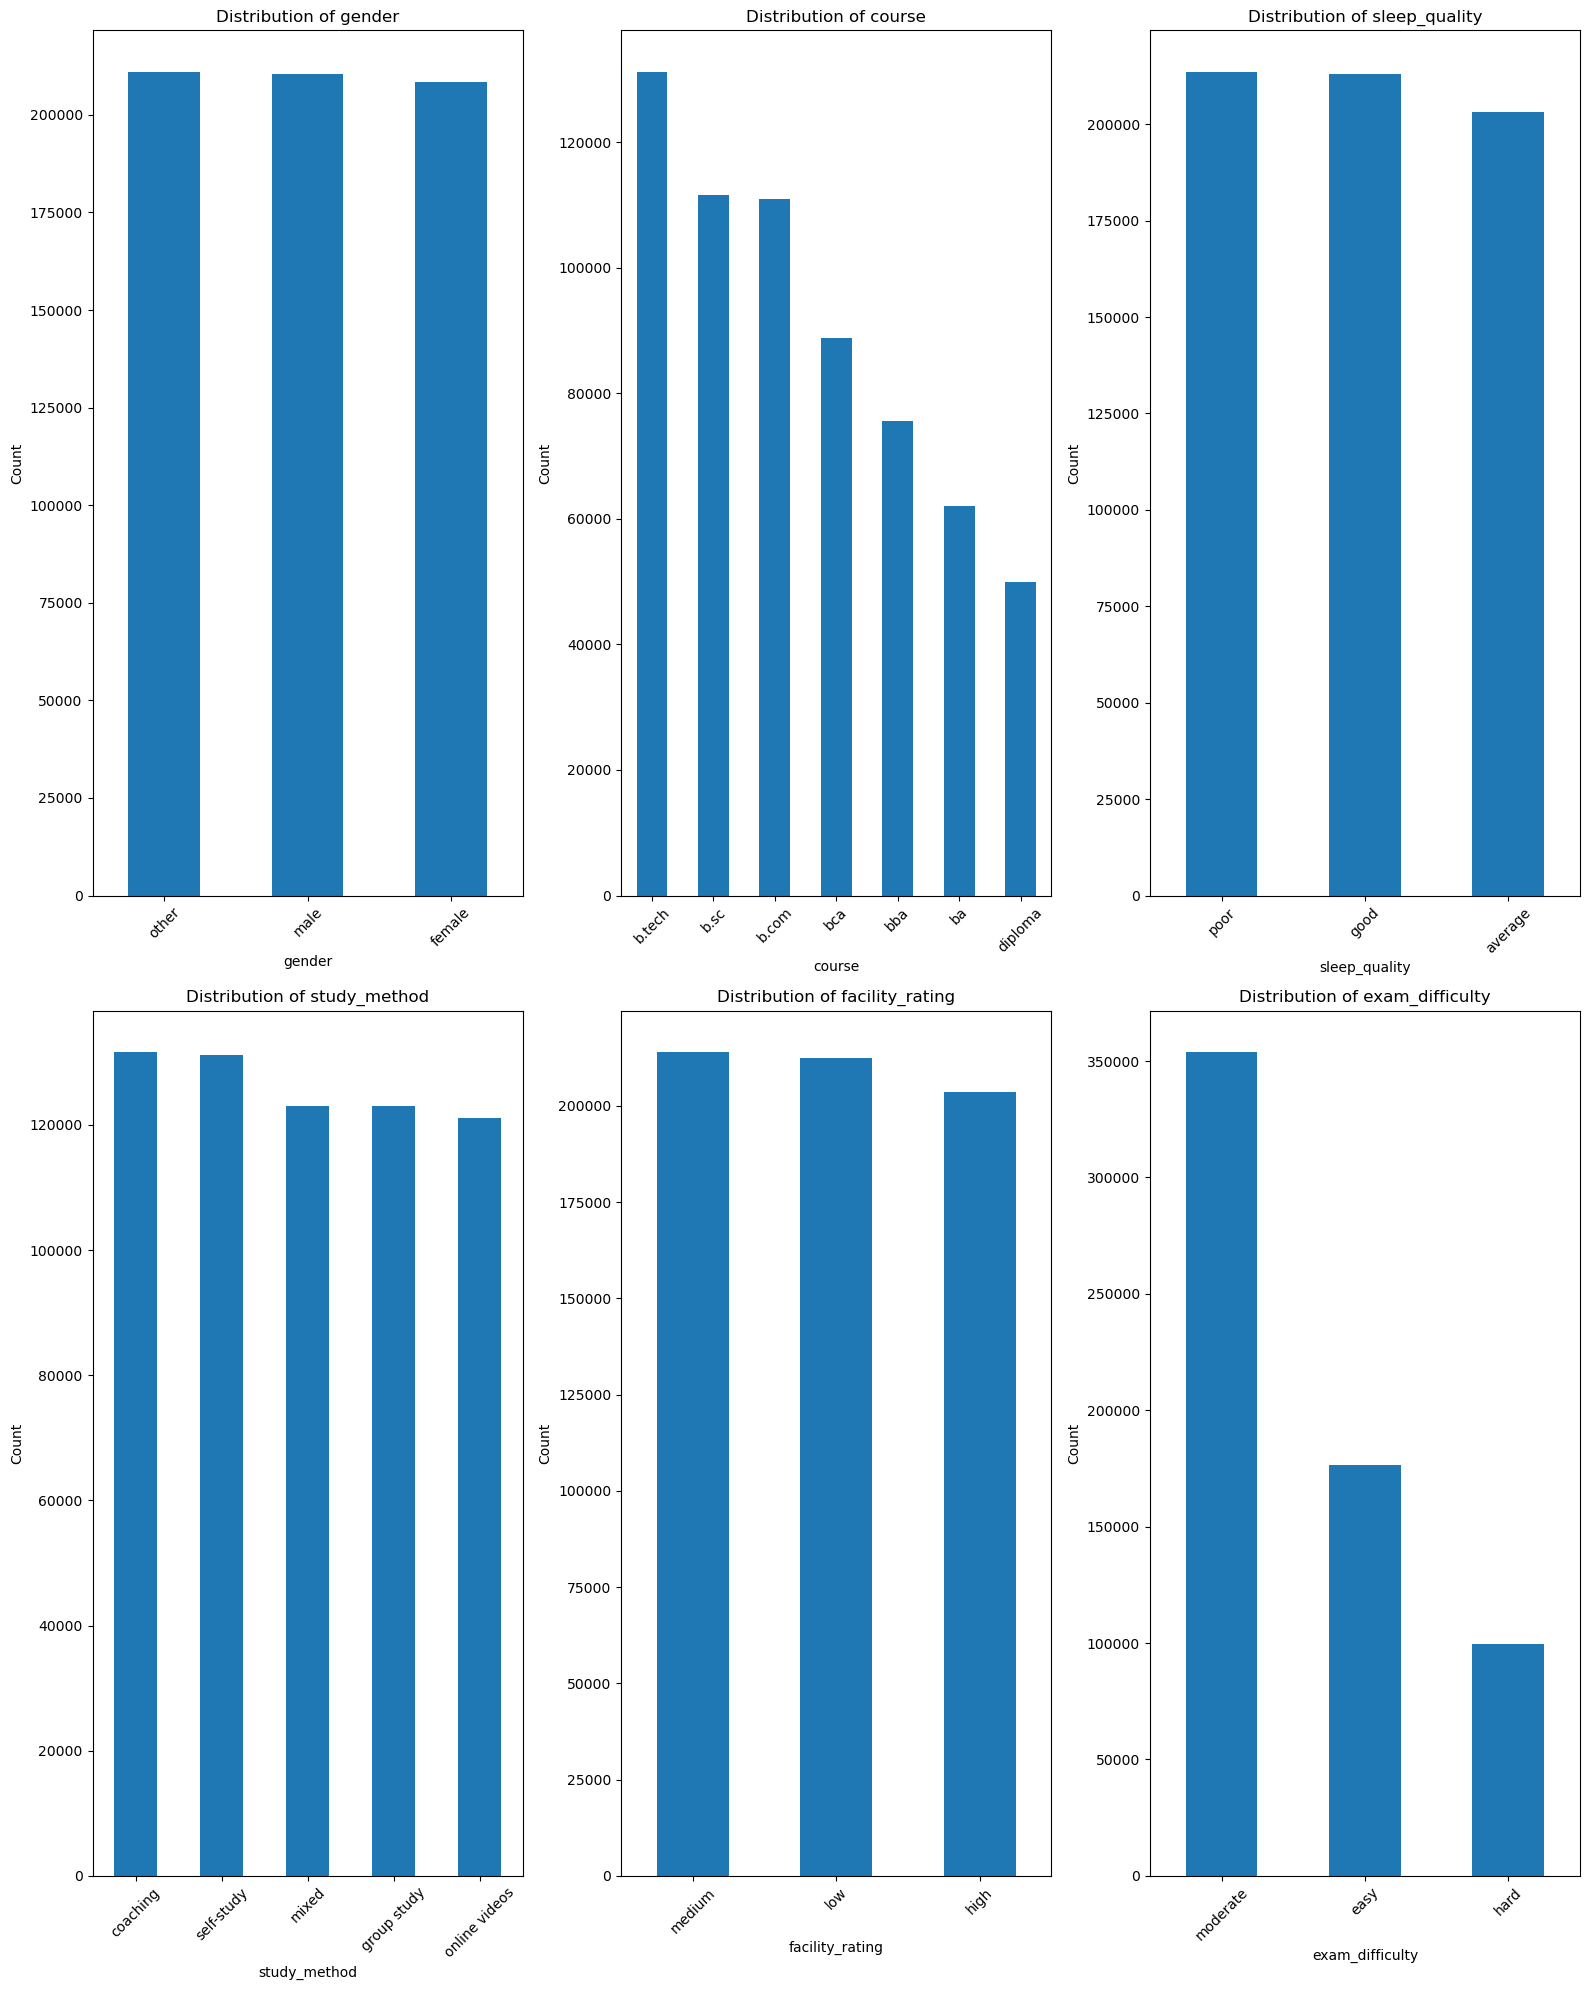

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(16, 20))
ax = np.concatenate([ax1, ax2])

cat_features = ['gender', 'course', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']

for axis, feature in zip(ax, cat_features):
    df_train[feature].value_counts().plot(kind='bar', ax=axis)
    axis.set_title(f'Distribution of {feature}')
    axis.tick_params(axis='x', rotation=45)
    axis.set_xlabel(feature)
    axis.set_ylabel('Count')

plt.tight_layout()
plt.show()

There we see the distributions of different categorical features

Some of them are distributed almost equally: gender, sleep_quality, study_method, facility_rating

And we see that the rarest exam difficulty is hard and moderate is more often

For courses the rarest is diploma and the most popular is b.tech

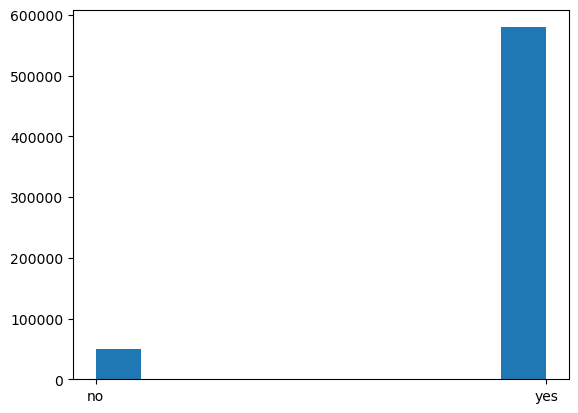

In [17]:
plt.hist(df_train.internet_access)
plt.show()

Now lets encode and scale our features:

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df_train.internet_access = df_train.internet_access.apply(lambda x: 1 if x == 'yes' else 0)
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_train[cat_features]).toarray())

Scaler = StandardScaler()
df_train[['age', 'study_hours', 'class_attendance', 'sleep_hours']] = Scaler.fit_transform(df_train[['age', 'study_hours', 'class_attendance', 'sleep_hours']])

Then we drop id column and all categorial features and add enc_df

In [19]:
X = df_train[['age', 'study_hours', 'class_attendance', 'sleep_hours', 'internet_access']].join(enc_df)
y = df_train['exam_score']
X.columns = X.columns.astype(str)
X.internet_access = X.internet_access.apply(lambda x: 1 if x == 'yes' else 0)

In [20]:
df_train.drop(['id', 'exam_score'], axis = 1)

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
0,0.200943,female,b.sc,1.655875,1.538302,0,-1.245269,average,online videos,low,easy
1,-1.126352,other,diploma,0.401573,1.308814,1,-1.359895,poor,self-study,medium,moderate
2,-0.241488,female,b.sc,0.287160,1.182595,1,-0.729454,poor,coaching,high,moderate
3,-0.683920,male,b.sc,-0.848492,-1.290141,1,0.703367,average,group study,high,moderate
4,1.085807,male,bca,1.545699,0.855575,1,1.448434,good,self-study,high,easy
...,...,...,...,...,...,...,...,...,...,...,...
629995,-1.126352,female,b.tech,0.363435,-0.073853,1,-1.703772,good,mixed,high,moderate
629996,0.200943,female,ba,1.304162,-1.009018,1,-1.474521,average,mixed,low,moderate
629997,1.528239,male,bca,-1.424793,-1.594213,1,-1.589146,poor,online videos,low,moderate
629998,-0.241488,male,b.com,-1.043417,0.178584,1,0.646054,average,group study,high,moderate


Then we split our new dataset into X_train, X_test, y_train, y_test:

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

Lets train default linear regression:

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error as rmse

model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)
rmse(predict, y_test)

8.889917881302633

Regression with Ridge Regularization

In [20]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
predict = model.predict(X_test)
rmse(predict, y_test)

8.88991763283453

Lets improve our results with the help of boosting

Hyperparameters we seek with the help of Random search cv

In [21]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param = {
    'n_estimators': np.arange(1, 10) * 100,  
    'max_depth': np.arange(1, 10),        
    'learning_rate': np.arange(20) / 100    
}
model = xgb.XGBRegressor(tree_method = 'hist', random_state = 42, n_jobs = -1, verbosity = 0)
best_model = RandomizedSearchCV(model, param_distributions = param, cv = 3, scoring = 'neg_root_mean_squared_error', verbose = 2, random_state = 42)
best_model.fit(X_train, y_train)
predict = best_model.predict(X_test)
print(best_model.best_params_)
rmse(predict, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..learning_rate=0.13, max_depth=9, n_estimators=200; total time=   4.1s
[CV] END ..learning_rate=0.13, max_depth=9, n_estimators=200; total time=   3.3s
[CV] END ..learning_rate=0.13, max_depth=9, n_estimators=200; total time=   3.7s
[CV] END ..learning_rate=0.18, max_depth=1, n_estimators=200; total time=   1.1s
[CV] END ..learning_rate=0.18, max_depth=1, n_estimators=200; total time=   1.1s
[CV] END ..learning_rate=0.18, max_depth=1, n_estimators=200; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=600; total time=   5.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=600; total time=   5.4s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=600; total time=   6.1s
[CV] END ..learning_rate=0.15, max_depth=9, n_estimators=800; total time=  13.1s
[CV] END ..learning_rate=0.15, max_depth=9, n_estimators=800; total time=  12.8s
[CV] END ..learning_rate=0.15, max_depth=9, n_es

8.767355318030518

Lets try catboost

In [34]:
from catboost import CatBoostRegressor as cbr

model = cbr()
model.fit(X_train, y_train)
predict = model.predict(X_test)
rmse(predict, y_test)

Learning rate set to 0.107152
0:	learn: 17.5819769	total: 53.6ms	remaining: 53.6s
1:	learn: 16.4344569	total: 102ms	remaining: 50.9s
2:	learn: 15.4332881	total: 154ms	remaining: 51.1s
3:	learn: 14.5560211	total: 207ms	remaining: 51.5s
4:	learn: 13.8078300	total: 257ms	remaining: 51.1s
5:	learn: 13.1501804	total: 310ms	remaining: 51.3s
6:	learn: 12.5728267	total: 363ms	remaining: 51.5s
7:	learn: 12.0857211	total: 420ms	remaining: 52.1s
8:	learn: 11.6635674	total: 471ms	remaining: 51.8s
9:	learn: 11.2998235	total: 523ms	remaining: 51.7s
10:	learn: 10.9768789	total: 574ms	remaining: 51.6s
11:	learn: 10.7063086	total: 629ms	remaining: 51.8s
12:	learn: 10.4672994	total: 683ms	remaining: 51.9s
13:	learn: 10.2643712	total: 724ms	remaining: 51s
14:	learn: 10.0895271	total: 763ms	remaining: 50.1s
15:	learn: 9.9372211	total: 803ms	remaining: 49.4s
16:	learn: 9.8050322	total: 843ms	remaining: 48.8s
17:	learn: 9.6868635	total: 885ms	remaining: 48.3s
18:	learn: 9.5845681	total: 929ms	remaining: 48s

8.757254007526933

lightgbm with random hyperparametrs

In [65]:
from lightgbm import LGBMRegressor

param = {
    'n_estimators': np.arange(1, 10) * 100,  
    'max_depth': np.arange(1, 10),        
    'learning_rate': np.arange(1, 20) / 100    
}
model = LGBMRegressor(random_state = 42, n_jobs = -1, verbose = -1)
best_model = RandomizedSearchCV(model, param_distributions = param, cv = 3, scoring = 'neg_root_mean_squared_error', random_state = 42)
best_model.fit(X_train, y_train)
predict = best_model.predict(X_test)
print(best_model.best_params_)
rmse(predict, y_test)

{'n_estimators': np.int64(800), 'max_depth': np.int64(7), 'learning_rate': np.float64(0.06)}


8.769452889570578

With the help of optuna finding the best hyperparameters for lightgbm model:

In [66]:
import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 10000)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1)
    model = LGBMRegressor(n_estimators = n_estimators, max_depth = max_depth, learning_rate = learning_rate, n_jobs = -1, verbose = -1)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    return rmse(predict, y_test) 

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('RMSE: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2026-01-08 16:16:54,288] A new study created in memory with name: no-name-0ede365c-e92f-4d9f-894b-725d7e0637f7
[I 2026-01-08 16:16:58,436] Trial 0 finished with value: 8.770885061852814 and parameters: {'n_estimators': 620, 'max_depth': 4, 'learning_rate': 0.08812080041223003}. Best is trial 0 with value: 8.770885061852814.
[I 2026-01-08 16:17:02,277] Trial 1 finished with value: 8.846628463371028 and parameters: {'n_estimators': 625, 'max_depth': 2, 'learning_rate': 0.028977640862132083}. Best is trial 0 with value: 8.770885061852814.
[I 2026-01-08 16:17:22,593] Trial 2 finished with value: 8.77801152007302 and parameters: {'n_estimators': 2700, 'max_depth': 16, 'learning_rate': 0.08082163505573395}. Best is trial 0 with value: 8.770885061852814.
[I 2026-01-08 16:18:00,717] Trial 3 finished with value: 8.785215724505797 and parameters: {'n_estimators': 4132, 'max_depth': 2, 'learning_rate': 0.051718592955230736}. Best is trial 0 with value: 8.770885061852814.
[I 2026-01-08 16:18:11

RMSE: 8.747243640067465
Best hyperparameters: {'n_estimators': 6882, 'max_depth': 4, 'learning_rate': 0.03519810498397541}


In [27]:
from lightgbm import LGBMRegressor
Best_hyperparameters = {'n_estimators': 6882, 'max_depth': 4, 'learning_rate': 0.03519810498397541}
model = LGBMRegressor(**Best_hyperparameters, verbose = -1)
model.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.03519810498397541, max_depth=4, n_estimators=6882,
              verbose=-1)

Encoding df_test to submit on kaggle

In [35]:
from sklearn.preprocessing import OneHotEncoder

df_test.internet_access = df_test.internet_access.apply(lambda x: 1 if x == 'yes' else 0)
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_test[['gender', 'course', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']]).toarray())

df_test[['age', 'study_hours', 'class_attendance', 'sleep_hours']] = Scaler.fit_transform(df_test[['age', 'study_hours', 'class_attendance', 'sleep_hours']])

In [36]:
X = df_test[['age', 'study_hours', 'class_attendance', 'sleep_hours', 'internet_access']].join(enc_df)
X.columns = X.columns.astype(str)

Make a prediction on the last model and we get the best result 8.71338 on kaggle

In [69]:
predict = model.predict(X)

df = pd.DataFrame({'id': df_test.id, 'exam_score': predict})

df.to_csv('submission.csv', index = False)

Deploing this model on local docker container 

In [ ]:
from lightgbm import LGBMRegressor
Best_hyperparameters = {'n_estimators': 6882, 'max_depth': 4, 'learning_rate': 0.03519810498397541}
model = LGBMRegressor(**Best_hyperparameters, verbose = -1)
model.fit(X_train[['age', 'study_hours', 'class_attendance', 'sleep_hours']], y_train)

LGBMRegressor(learning_rate=0.03519810498397541, max_depth=4, n_estimators=6882,
              verbose=-1)

Saving our last model in 'model.pkl'

In [23]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)